In [1]:
import sys
import os
sys.path.append(os.path.abspath("../Instruments"))
import numpy as np
from ETF import ETF
from Future import Future
from Portfolio import Portfolio

Max sharpe ratio: 0.4849867360001715
Max sharpe ratio portfolio annualized log return: 0.08800899399677772
Max sharpe ratio portfolio annualized volatility of log returns: 0.0986154894840857
Max sharpe ratio portfolio weights: [ 0.44212618  0.11456525  0.47756866 -0.03426009]

                              XLK            XLU            FF1            CL1
                   XLK Log Return XLU Log Return FF1 Log Return CL1 Log Return
XLK XLK Log Return       0.041238       0.019096      -0.000059       0.026853
XLU XLU Log Return       0.019096       0.031007      -0.000037       0.010917
FF1 FF1 Log Return      -0.000059      -0.000037       0.000009      -0.000061
CL1 CL1 Log Return       0.026853       0.010917      -0.000061       0.209896

0.0986154894840857


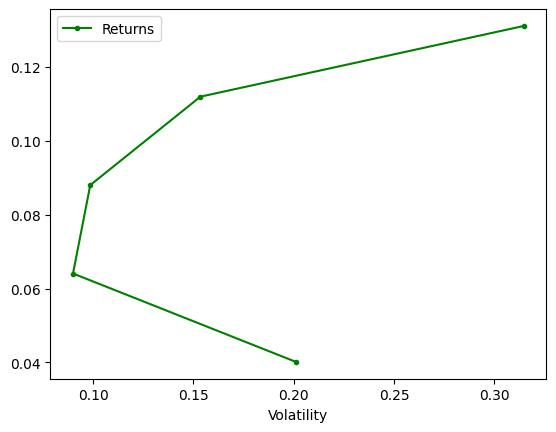

In [2]:
etfSPY = ETF("SPY")
etfXLK = ETF("XLK")
etfXLU = ETF("XLU")
futureFF1 = Future("FF1")
futureCL1 = Future("CL1")
etfAQMIX = ETF("AQMIX")
futureFF1 = Future("FF1")
portfolio1 = Portfolio([etfXLK, etfXLU, futureFF1, futureCL1], rf=0.041, equity_benchmark=etfSPY, future_benchmark=etfAQMIX)
portfolio1.plot_ef(n_points=5)
max_sharpe_ratio, ret, vol, weights = portfolio1.max_sharpe_portfolio(n_points=5)
print("Max sharpe ratio: " + str(max_sharpe_ratio))
print("Max sharpe ratio portfolio annualized log return: " + str(ret))
print("Max sharpe ratio portfolio annualized volatility of log returns: " + str(vol))
print("Max sharpe ratio portfolio weights: " + str(weights))
print()
print(portfolio1.annualized_covariance_matrix())
print()
print(portfolio1.annualized_portfolio_vol(weights))



In [3]:
futureCL1 = Future("CL1")
etfAQMIX = ETF("AQMIX")
portfolio2 = Portfolio([futureCL1], rf=0.041, future_benchmark=etfAQMIX)
portfolio2.filter(startDate="2010-01-01", endDate="2020-12-31")
print(portfolio2.historical_annualized_log_return(np.array(1)))

-0.0447450853421123
